<a href="https://colab.research.google.com/github/NikhitaShankar97/movie-analytics-dashboard/blob/main/docs/EDA_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading Datasets
2. Data Cleaning & Manipulation
3. Complex Analysis
4. Saving the Cleaned Data
5. Visualization

In [ ]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')
links = pd.read_csv('/content/links.csv')

# Inspect the first few rows of each dataset
print(movies.head())
print(ratings.head())
print(tags.head())
print(links.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476297
2      22   247150   acrophobia  1622483469
3

In [ ]:
# Drop rows with missing values (if any)
movies_cleaned = movies.dropna()

In [ ]:
# Split genres and create a new exploded DataFrame
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')

# Check the exploded data
print(movies_exploded.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

  genres_split  
0    Adventure  
0    Animation  
0     Children  
0       Comedy  
0      Fantasy  


In [ ]:
# Merge movies with ratings
movies_ratings = pd.merge(movies_exploded, ratings, on='movieId', how='inner')

# Check the merged dataset
print(movies_ratings.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

  genres_split  userId  rating   timestamp  
0    Adventure      10     2.5  1169265231  
1    Adventure      11     3.0   850085076  
2    Adventure      17     4.0  1027305751  
3    Adventure      19     3.0   974704488  
4    Adventure      20     5.0  1553184230  


In [ ]:
# Calculate the average rating for each movie and sort by highest rating
top_rated_movies = movies_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)

# Merge with the movie titles to display the top-rated movies with titles
top_rated_movies_with_titles = pd.merge(top_rated_movies.reset_index(), movies[['movieId', 'title']], on='movieId', how='inner')
print(top_rated_movies_with_titles)


   movieId  rating                                title
0   163797     5.0                Hello, Sister! (1933)
1   183629     5.0   The Garden Was Full of Moon (2000)
2   193387     5.0                          Days (1963)
3   177459     5.0                   Judas' Kiss (1954)
4   227300     5.0                       Banking Nature
5   140801     5.0                          Kano (2014)
6   215821     5.0            No Mercy No Future (1981)
7   240360     5.0  The Island Closest to Heaven (1984)
8   193435     5.0              We All Fall Down (2016)
9   280770     5.0    A Banda das Velhas Virgens (1979)


In [ ]:
# Count the occurrence of each genre
genre_count = movies_exploded['genres_split'].value_counts()

# Display the top 10 most popular genres
print(genre_count.head(10))

genres_split
Drama                 34175
Comedy                23124
Thriller              11823
Romance               10369
Action                 9668
Documentary            9363
Horror                 8654
(no genres listed)     7080
Crime                  6976
Adventure              5402
Name: count, dtype: int64


**We can analyze when users are most active by converting the timestamp from the ratings.csv into a readable date format.**

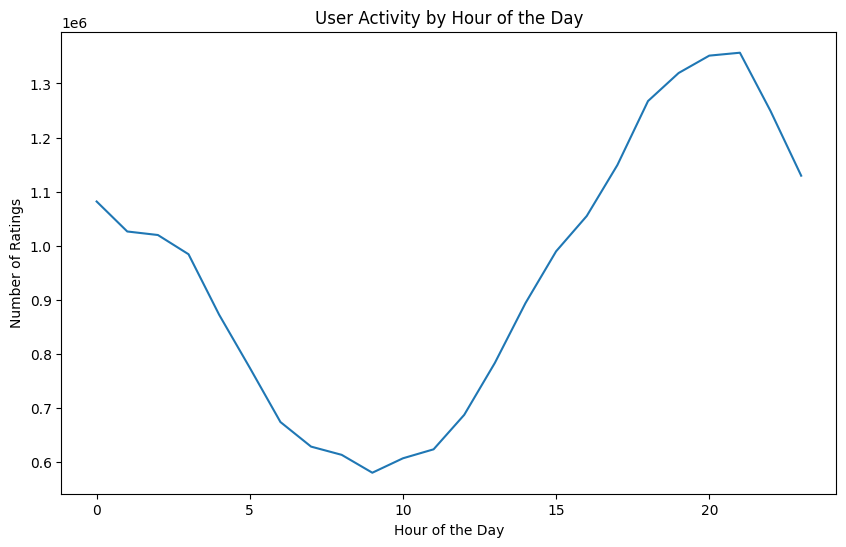

In [ ]:
# Convert timestamp to datetime
ratings['rating_date'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extract the hour from the timestamp
ratings['hour'] = ratings['rating_date'].dt.hour

# Count the number of ratings by hour
ratings_by_hour = ratings.groupby('hour').size()

# Plot user activity by hour
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ratings_by_hour.index, ratings_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ratings')
plt.title('User Activity by Hour of the Day')
plt.show()

**Key Observations:**
**1. Early Morning Low Activity (Hours 0-6):**

User activity is lowest between 2 AM and 6 AM, which makes sense as this is generally when people are sleeping.

**2. Steady Increase in Activity (Hours 7-15):**

Activity starts to increase gradually after 7 AM, with more ratings being submitted as the day progresses.
The activity is relatively low until about noon.

**3. Peak Activity in the Evening (Hours 16-21):**

The highest activity occurs between 4 PM and 9 PM. This suggests that users are most active during the evening, likely after work or school, which is a common time for people to watch movies and rate them.

**4. Slight Drop after Peak (Hours 21-23):**

Activity begins to drop off after 9 PM, as people start wrapping up their day.

**Interpretation:**
The graph indicates that users are most active in the evening hours, and the platform sees the lowest activity during the early morning hours.
This information can be useful for:
**Optimizing server performance** during peak times.
**Targeted promotions** and recommendations during the most active hours to increase user engagement.
**Planning maintenance or updates** during off-peak hours to minimize disruption.









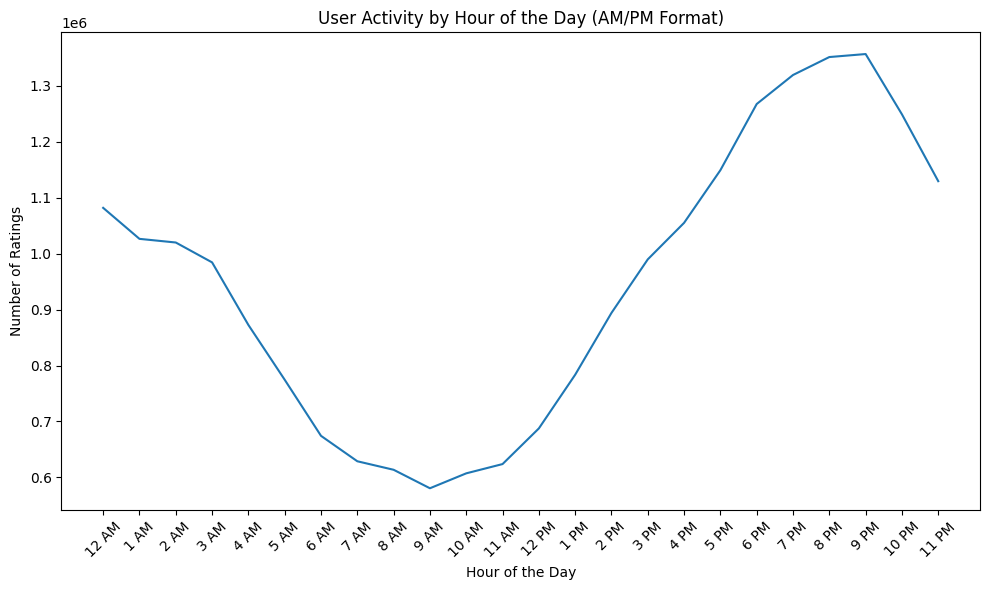

In [ ]:
# Convert 24-hour format to 12-hour format with AM/PM labels
hour_labels = []
for hour in ratings_by_hour.index:
    if hour == 0:
        hour_labels.append('12 AM')
    elif hour < 12:
        hour_labels.append(f'{hour} AM')
    elif hour == 12:
        hour_labels.append('12 PM')
    else:
        hour_labels.append(f'{hour - 12} PM')

# Plot user activity with AM/PM labels
plt.figure(figsize=(10, 6))
plt.plot(ratings_by_hour.index, ratings_by_hour.values)
plt.xticks(ticks=ratings_by_hour.index, labels=hour_labels, rotation=45)  # Rotate x-tick labels by 45 degrees
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ratings')
plt.title('User Activity by Hour of the Day (AM/PM Format)')
plt.tight_layout()  # Adjusts the plot to make sure the labels fit well
plt.show()

The **Number of Ratings** in the graph represents how active users were at different hours of the day, specifically how many movie ratings were submitted by users during each hour. The **y-axis** shows the count of ratings, and the **x-axis** shows the time of day (in hours, formatted as AM/PM).

Saving cleaned and processed data to a new CSV file

In [ ]:
# Save the ratings data by hour of the day to a CSV file
ratings_by_hour.to_csv('user_activity_by_hour.csv', index=True)

# Save any other processed data (e.g., exploded genres) if needed
movies_ratings.to_csv('processed_movies_ratings.csv', index=False)


**user_activity_by_hour.csv:** This file will contain the
number of ratings for each hour of the day. It can be used for further analysis or visualization in other tools like Tableau.

**processed_movies_ratings.csv:** This file would contain the cleaned and manipulated dataset, including the merged movie and ratings data, which could also be useful for more in-depth analysis.

#### **Most Popular Genres based on the cleaned movie data**

<ipython-input-13-3f815b899221>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.head(10).values, y=genre_count.head(10).index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

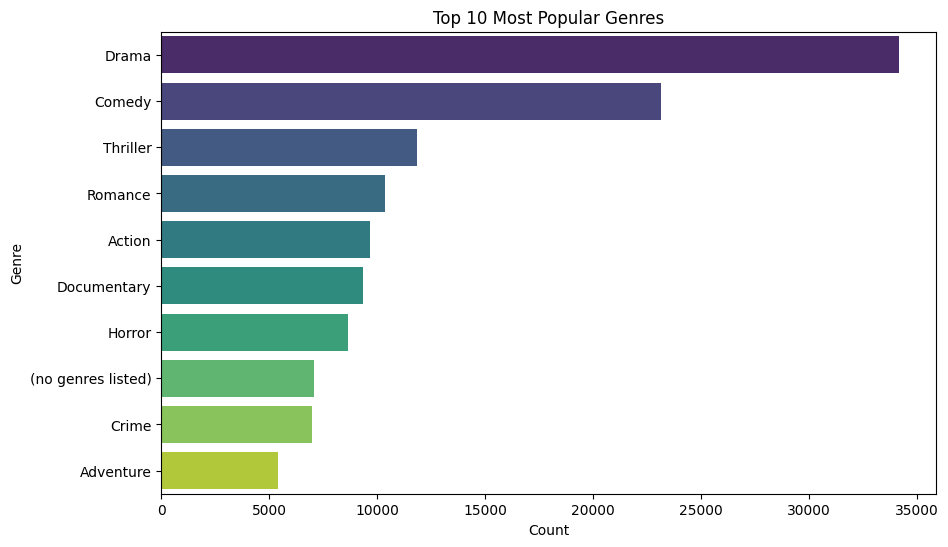

In [ ]:
import seaborn as sns

# Count the occurrence of each genre (assuming you've already exploded the 'genres_split' column)
genre_count = movies_exploded['genres_split'].value_counts()

# Plot the top 10 most popular genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.head(10).values, y=genre_count.head(10).index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Genres')
plt.show()